In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_table('./airbnb-listings-extract.csv',sep=';', decimal='.')
data.shape

(14780, 89)

### Observar el tipo de variables que tenemos en el dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

### Preparación del dataset

#### Primero vamos a filtrar los  registros que no nos interesan

In [4]:
"""
Vamos a conocer primero las ciudades que tenemos, la que nos interesa es Madrid, pero veamos si hay referencias distintas o nulas """
data['City'].unique()

array(['Austin', 'Barcelona', 'Amsterdam', 'Antwerpen', 'Paris',
       'Alcúdia', 'Madrid', '马德里', 'Madrid, Comunidad de Madrid, ES',
       'Salerno', 'Pozuelo de Alarcón', 'Manacor', 'Felanitx',
       'Portals Nous', 'Andratx', 'Santa Maria del Camí',
       'Port de Pollença', 'West Hollywood', 'London', 'Londres',
       'Pasadena', 'Búger', 'Brooklyn', 'New York', 'Dublin', 'Edinburgh',
       'Roma', 'Bruxelles', 'Hospitalet de Llobregat', 'Washington',
       'Athina', 'Saint-Josse-ten-Noode', 'Greater London', 'Campos',
       'Llucmajor', 'Muro', 'Manchester', nan, 'Palma de Mallorca',
       'Pina', 'Inca', 'Mancor de la Vall', 'Illes Balears', 'Selva',
       'Los Angeles', 'København', 'Woolloomooloo', 'Palma',
       'Colònia de Sant Jordi', 'North Sydney', 'Madri', 'Sóller',
       'Seattle', 'Athens', 'Berlin', 'Frederiksberg', 'Pina, Mallorca',
       'Valldemossa', 'Pollensa', 'Puerto ALCUDIA', "Port d'Andratx",
       'Peguera, Calvià', 'Torrenova', 'Deià',
       '

Podemos ver que existen algunas referencias a Madrid, pero no todas son correctas, por lo que vamos a filtrarlas, adicional a ello, encontramos un NaN, que vamos a eliminar también.

In [5]:
# Este es el registro NaN que vamos a eliminar
data[pd.isna(data['Country'])]

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
151,1553260,https://www.airbnb.com/rooms/1553260,20170407214119,2017-04-08,¡Urgente! Busco Piso en Madrid,Hola me llamo Filomena soy Italiana tengo 24 c...,NaN,Hola me llamo Filomena soy Italiana tengo 24 c...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4767132864,-3.57188970158","Host Has Profile Pic,Is Location Exact"


In [6]:
## Adicional buscamos inconsistencias en torno a la ciudad, Barrio, pais,
review_data = data[pd.isna(data['City'])]
"""imprimimos solo las columnas relacionadas con la ubicación"""
review_data[['Country','City','Neighbourhood', 'State', 'Smart Location', 'Market', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']]

,Country,City,Neighbourhood,State,Smart Location,Market,Neighbourhood Cleansed,Neighbourhood Group Cleansed
1279,Spain,NaN,NaN,NaN,"ES, Spain",Madrid,Ciudad Universitaria,Moncloa - Aravaca
5776,Spain,NaN,NaN,NaN,"ES, Spain",Madrid,Ciudad Universitaria,Moncloa - Aravaca
9072,Spain,NaN,NaN,NaN,"ES, Spain",Madrid,Ciudad Universitaria,Moncloa - Aravaca
10878,Spain,NaN,Cortes,Madrid,"Madrid, Spain",Madrid,Cortes,Centro
14196,Spain,NaN,NaN,NaN,"ES, Spain",Madrid,Ciudad Universitaria,Moncloa - Aravaca
14620,Spain,NaN,Arapiles,Madrid,"Madrid, Spain",Madrid,Vallehermoso,Chamberí


#### Se observa que varios registros no tienen información de la ciudad, sin embargo el barrio coincide con Madrid, por lo que vamos a rellenar los valores nulos con Madrid

In [7]:
# obtenemos la lista de indices del subset
list_index = data[pd.isna(data['City'])].index.to_list()
list_index

[1279, 5776, 9072, 10878, 14196, 14620]

In [8]:
data.iloc[list_index, :]

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
1279,18104804,https://www.airbnb.com/rooms/18104804,20170407214119,2017-04-08,Cozy elevator room two,"The room is comfortable and warm, let you have...",NaN,"The room is comfortable and warm, let you have...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4629285489,-3.74804901131","Host Has Profile Pic,Requires License,Instant ..."
5776,18060882,https://www.airbnb.com/rooms/18060882,20170407214119,2017-04-08,European style apartment,"I say the cabin, convenient transportation, li...",NaN,"I say the cabin, convenient transportation, li...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4633443292,-3.74859392191","Host Has Profile Pic,Requires License,Instant ..."
9072,18059700,https://www.airbnb.com/rooms/18059700,20170407214119,2017-04-08,European style apartment,"I say the cabin, convenient transportation, li...",NaN,"I say the cabin, convenient transportation, li...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4633306219,-3.7482000585","Host Has Profile Pic,Requires License,Instant ..."
10878,9575680,https://www.airbnb.com/rooms/9575680,20170407214119,2017-04-08,STUNNING Boutique Studio in CENTER LETRAS WIFI&AC,Welcome to our new gorgeous studio boutique s...,Our gorgeous studio is like a luxury boutique ...,Welcome to our new gorgeous studio boutique s...,none,Barrio de Las Huertas is one of the prettiest ...,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,2.79,"40.4142925995,-3.69831009603","Host Is Superhost,Host Has Profile Pic,Host Id..."
14196,18105783,https://www.airbnb.com/rooms/18105783,20170407214119,2017-04-08,Comfortable two bedroom,"Housing for two rooms, refined decoration, the...",NaN,"Housing for two rooms, refined decoration, the...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4633344391,-3.75012859262","Host Has Profile Pic,Requires License,Instant ..."
14620,5602310,https://www.airbnb.com/rooms/5602310,20170407214119,2017-04-08,Center Chamberi Gorgeous studio suite with WiF...,Gorgeous studio recently refurbished. The apar...,We have put all our love and efforts to ensure...,Gorgeous studio recently refurbished. The apar...,none,The Chamberi neighbourhood is one of the most ...,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,2.69,"40.4388344852,-3.70862245084","Host Is Superhost,Host Has Profile Pic,Host Id..."


Los anteriores registros tienen información incompleta, por lo que vamos a integrarlos en el dataset con la información correcta y hacer las eliminaciones correspondientes

In [9]:
# Ajustamos los registros anteriores con el nombre de la ciudad correcta para los registros que tienen NaN
data.loc[data['City'].isna(), 'City'] = 'Madrid'

In [10]:
# Comprobamos que se hizo el cambio correcto
data.iloc[list_index, :]

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
1279,18104804,https://www.airbnb.com/rooms/18104804,20170407214119,2017-04-08,Cozy elevator room two,"The room is comfortable and warm, let you have...",NaN,"The room is comfortable and warm, let you have...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4629285489,-3.74804901131","Host Has Profile Pic,Requires License,Instant ..."
5776,18060882,https://www.airbnb.com/rooms/18060882,20170407214119,2017-04-08,European style apartment,"I say the cabin, convenient transportation, li...",NaN,"I say the cabin, convenient transportation, li...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4633443292,-3.74859392191","Host Has Profile Pic,Requires License,Instant ..."
9072,18059700,https://www.airbnb.com/rooms/18059700,20170407214119,2017-04-08,European style apartment,"I say the cabin, convenient transportation, li...",NaN,"I say the cabin, convenient transportation, li...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4633306219,-3.7482000585","Host Has Profile Pic,Requires License,Instant ..."
10878,9575680,https://www.airbnb.com/rooms/9575680,20170407214119,2017-04-08,STUNNING Boutique Studio in CENTER LETRAS WIFI&AC,Welcome to our new gorgeous studio boutique s...,Our gorgeous studio is like a luxury boutique ...,Welcome to our new gorgeous studio boutique s...,none,Barrio de Las Huertas is one of the prettiest ...,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,2.79,"40.4142925995,-3.69831009603","Host Is Superhost,Host Has Profile Pic,Host Id..."
14196,18105783,https://www.airbnb.com/rooms/18105783,20170407214119,2017-04-08,Comfortable two bedroom,"Housing for two rooms, refined decoration, the...",NaN,"Housing for two rooms, refined decoration, the...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4633344391,-3.75012859262","Host Has Profile Pic,Requires License,Instant ..."
14620,5602310,https://www.airbnb.com/rooms/5602310,20170407214119,2017-04-08,Center Chamberi Gorgeous studio suite with WiF...,Gorgeous studio recently refurbished. The apar...,We have put all our love and efforts to ensure...,Gorgeous studio recently refurbished. The apar...,none,The Chamberi neighbourhood is one of the most ...,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,2.69,"40.4388344852,-3.70862245084","Host Is Superhost,Host Has Profile Pic,Host Id..."


#### Ahora buscamos los registros que contienen en la columna City la palabra Madrid

In [11]:
# Buscamos los registros que contienen la palabra Madrid y mas palabras en la columna City, excepto Madrid
data[data['City'].str.contains('Madrid') & ~data['City'].str.contains('Madrid$')]

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
143,15495227,https://www.airbnb.com/rooms/15495227,20170407214119,2017-04-08,Habitación bonita y privada,"Habitación privada ,en piso compartido con un...",NaN,"Habitación privada ,en piso compartido con un...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,2.0,NaN,"40.3961481177,-3.70984211936","Host Has Profile Pic,Requires License"
1207,15040064,https://www.airbnb.com/rooms/15040064,20170407214119,2017-04-08,Bonito Apart. en barrio Salamanca.,"Bonito, cómodo y céntrico apto. Con balcón, sa...",El apartamento es muy acogedor. En el salón ha...,"Bonito, cómodo y céntrico apto. Con balcón, sa...",none,Es un barrio con muchas vida y que te permite ...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,0.59,"40.4321860964,-3.66376632168","Host Has Profile Pic,Host Identity Verified,Re..."
1564,13878024,https://www.airbnb.com/rooms/13878024,20170407214119,2017-04-08,"Apartamento (loft) en Puerta de Sol , kmO, 3 PAX.","El apartamento(LOFT), esta ubicado en el km0 d...","Hello my apartment (lotf), makes it special th...","El apartamento(LOFT), esta ubicado en el km0 d...",none,Apartment (lotf) downtown at km 0 of Madrid. P...,...,10.0,10.0,9.0,NaN,NaN,strict,1.0,6.15,"40.4175982373,-3.70361930742","Host Has Profile Pic,Requires License,Instant ..."
2006,16749266,https://www.airbnb.com/rooms/16749266,20170407214119,2017-04-08,Habitación con baño privado,"Habitación muy soleada con baño privado, a sol...",NaN,"Habitación muy soleada con baño privado, a sol...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.3495913942,-3.67863962369",Requires License
3434,16881356,https://www.airbnb.com/rooms/16881356,20170407214119,2017-04-08,Piso en el casco antiguo de Madrid,Alojarte en nuestro piso hará de tu estancia e...,NaN,Alojarte en nuestro piso hará de tu estancia e...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,flexible,4.0,1.88,"40.4087563809,-3.70427850153","Host Has Profile Pic,Requires License,Instant ..."
3671,17359366,https://www.airbnb.com/rooms/17359366,20170407214119,2017-04-08,Zona tranquila y pido acogedor,Apartamento con todo los servicios incluido tv...,"Es familiar , tranquilidad y acogedor",Apartamento con todo los servicios incluido tv...,none,"Tranquilo , metro , taxis y bus",...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4275688241,-3.63852034643","Host Has Profile Pic,Requires License,Instant ..."
3744,15495427,https://www.airbnb.com/rooms/15495427,20170407214119,2017-04-08,Bonito piso de 1 habitacion,"Acogedor piso con todas las comodidades, te s...",NaN,"Acogedor piso con todas las comodidades, te s...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,0.19,"40.3963196166,-3.71007805188","Host Has Profile Pic,Requires License"
3833,16446535,https://www.airbnb.com/rooms/16446535,20170407214119,2017-04-08,Habitación a 200m Gran Vía Madrid!!,"Habitación con cama de matrimonio, espaciosa y...",Tranquilo y muy céntrico,"Habitación con cama de matrimonio, espaciosa y...",none,El barrio de Malasaña es muy céntrico con toda...,...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,1.55,"40.4243294422,-3.70517201514","Host Has Profile Pic,Requires License,Instant ..."
4014,15236083,https://www.airbnb.com/rooms/15236083,20170407214119,2017-04-08,Habitacion preciosa y soleada,"Son dos habitaciones muy tranquilas, no hay ru...",La tranquilidad y cercania,"Son dos habitaciones muy tranquilas, no hay ru...",none,"Lo cerca que esta del metro, renfe y autobuses",...,10.0,10.0,10.0,NaN,NaN,flexible,2.0,1.38,"40.3857369646,-3.76572320285","Host Has Profile Pic,Requires License,Instant ..."
5834,16174647,https://www.airbnb.com/rooms/16174647,20170407214119,2017-04-08,Cozy apartment with parking lot,Cozy apartment with parking lot in the residen...,Charming and comfortable apartmen

In [12]:
# Obtenemos la lista de indices de los registros que contienen la palabra Madrid, esto para referencias futuras en caso de necesitarlas
list_madrid_other_name = data[data['City'].str.contains('Madrid') & ~data['City'].str.contains('Madrid$')].index.to_list()
data.iloc[list_madrid_other_name, :]

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
143,15495227,https://www.airbnb.com/rooms/15495227,20170407214119,2017-04-08,Habitación bonita y privada,"Habitación privada ,en piso compartido con un...",NaN,"Habitación privada ,en piso compartido con un...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,2.0,NaN,"40.3961481177,-3.70984211936","Host Has Profile Pic,Requires License"
1207,15040064,https://www.airbnb.com/rooms/15040064,20170407214119,2017-04-08,Bonito Apart. en barrio Salamanca.,"Bonito, cómodo y céntrico apto. Con balcón, sa...",El apartamento es muy acogedor. En el salón ha...,"Bonito, cómodo y céntrico apto. Con balcón, sa...",none,Es un barrio con muchas vida y que te permite ...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,0.59,"40.4321860964,-3.66376632168","Host Has Profile Pic,Host Identity Verified,Re..."
1564,13878024,https://www.airbnb.com/rooms/13878024,20170407214119,2017-04-08,"Apartamento (loft) en Puerta de Sol , kmO, 3 PAX.","El apartamento(LOFT), esta ubicado en el km0 d...","Hello my apartment (lotf), makes it special th...","El apartamento(LOFT), esta ubicado en el km0 d...",none,Apartment (lotf) downtown at km 0 of Madrid. P...,...,10.0,10.0,9.0,NaN,NaN,strict,1.0,6.15,"40.4175982373,-3.70361930742","Host Has Profile Pic,Requires License,Instant ..."
2006,16749266,https://www.airbnb.com/rooms/16749266,20170407214119,2017-04-08,Habitación con baño privado,"Habitación muy soleada con baño privado, a sol...",NaN,"Habitación muy soleada con baño privado, a sol...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.3495913942,-3.67863962369",Requires License
3434,16881356,https://www.airbnb.com/rooms/16881356,20170407214119,2017-04-08,Piso en el casco antiguo de Madrid,Alojarte en nuestro piso hará de tu estancia e...,NaN,Alojarte en nuestro piso hará de tu estancia e...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,flexible,4.0,1.88,"40.4087563809,-3.70427850153","Host Has Profile Pic,Requires License,Instant ..."
3671,17359366,https://www.airbnb.com/rooms/17359366,20170407214119,2017-04-08,Zona tranquila y pido acogedor,Apartamento con todo los servicios incluido tv...,"Es familiar , tranquilidad y acogedor",Apartamento con todo los servicios incluido tv...,none,"Tranquilo , metro , taxis y bus",...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4275688241,-3.63852034643","Host Has Profile Pic,Requires License,Instant ..."
3744,15495427,https://www.airbnb.com/rooms/15495427,20170407214119,2017-04-08,Bonito piso de 1 habitacion,"Acogedor piso con todas las comodidades, te s...",NaN,"Acogedor piso con todas las comodidades, te s...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,0.19,"40.3963196166,-3.71007805188","Host Has Profile Pic,Requires License"
3833,16446535,https://www.airbnb.com/rooms/16446535,20170407214119,2017-04-08,Habitación a 200m Gran Vía Madrid!!,"Habitación con cama de matrimonio, espaciosa y...",Tranquilo y muy céntrico,"Habitación con cama de matrimonio, espaciosa y...",none,El barrio de Malasaña es muy céntrico con toda...,...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,1.55,"40.4243294422,-3.70517201514","Host Has Profile Pic,Requires License,Instant ..."
4014,15236083,https://www.airbnb.com/rooms/15236083,20170407214119,2017-04-08,Habitacion preciosa y soleada,"Son dos habitaciones muy tranquilas, no hay ru...",La tranquilidad y cercania,"Son dos habitaciones muy tranquilas, no hay ru...",none,"Lo cerca que esta del metro, renfe y autobuses",...,10.0,10.0,10.0,NaN,NaN,flexible,2.0,1.38,"40.3857369646,-3.76572320285","Host Has Profile Pic,Requires License,Instant ..."
5834,16174647,https://www.airbnb.com/rooms/16174647,20170407214119,2017-04-08,Cozy apartment with parking lot,Cozy apartment with parking lot in the residen...,Charming and comfortable apartmen

In [13]:
# Usaremos la lista anterior para cambiar el nombre de la ciudad a Madrid
data.loc[list_madrid_other_name, 'City'] = 'Madrid'

In [14]:
# Comprobamos que se hizo el cambio correcto
data.iloc[list_madrid_other_name, :]

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
143,15495227,https://www.airbnb.com/rooms/15495227,20170407214119,2017-04-08,Habitación bonita y privada,"Habitación privada ,en piso compartido con un...",NaN,"Habitación privada ,en piso compartido con un...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,2.0,NaN,"40.3961481177,-3.70984211936","Host Has Profile Pic,Requires License"
1207,15040064,https://www.airbnb.com/rooms/15040064,20170407214119,2017-04-08,Bonito Apart. en barrio Salamanca.,"Bonito, cómodo y céntrico apto. Con balcón, sa...",El apartamento es muy acogedor. En el salón ha...,"Bonito, cómodo y céntrico apto. Con balcón, sa...",none,Es un barrio con muchas vida y que te permite ...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,0.59,"40.4321860964,-3.66376632168","Host Has Profile Pic,Host Identity Verified,Re..."
1564,13878024,https://www.airbnb.com/rooms/13878024,20170407214119,2017-04-08,"Apartamento (loft) en Puerta de Sol , kmO, 3 PAX.","El apartamento(LOFT), esta ubicado en el km0 d...","Hello my apartment (lotf), makes it special th...","El apartamento(LOFT), esta ubicado en el km0 d...",none,Apartment (lotf) downtown at km 0 of Madrid. P...,...,10.0,10.0,9.0,NaN,NaN,strict,1.0,6.15,"40.4175982373,-3.70361930742","Host Has Profile Pic,Requires License,Instant ..."
2006,16749266,https://www.airbnb.com/rooms/16749266,20170407214119,2017-04-08,Habitación con baño privado,"Habitación muy soleada con baño privado, a sol...",NaN,"Habitación muy soleada con baño privado, a sol...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.3495913942,-3.67863962369",Requires License
3434,16881356,https://www.airbnb.com/rooms/16881356,20170407214119,2017-04-08,Piso en el casco antiguo de Madrid,Alojarte en nuestro piso hará de tu estancia e...,NaN,Alojarte en nuestro piso hará de tu estancia e...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,flexible,4.0,1.88,"40.4087563809,-3.70427850153","Host Has Profile Pic,Requires License,Instant ..."
3671,17359366,https://www.airbnb.com/rooms/17359366,20170407214119,2017-04-08,Zona tranquila y pido acogedor,Apartamento con todo los servicios incluido tv...,"Es familiar , tranquilidad y acogedor",Apartamento con todo los servicios incluido tv...,none,"Tranquilo , metro , taxis y bus",...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4275688241,-3.63852034643","Host Has Profile Pic,Requires License,Instant ..."
3744,15495427,https://www.airbnb.com/rooms/15495427,20170407214119,2017-04-08,Bonito piso de 1 habitacion,"Acogedor piso con todas las comodidades, te s...",NaN,"Acogedor piso con todas las comodidades, te s...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,0.19,"40.3963196166,-3.71007805188","Host Has Profile Pic,Requires License"
3833,16446535,https://www.airbnb.com/rooms/16446535,20170407214119,2017-04-08,Habitación a 200m Gran Vía Madrid!!,"Habitación con cama de matrimonio, espaciosa y...",Tranquilo y muy céntrico,"Habitación con cama de matrimonio, espaciosa y...",none,El barrio de Malasaña es muy céntrico con toda...,...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,1.55,"40.4243294422,-3.70517201514","Host Has Profile Pic,Requires License,Instant ..."
4014,15236083,https://www.airbnb.com/rooms/15236083,20170407214119,2017-04-08,Habitacion preciosa y soleada,"Son dos habitaciones muy tranquilas, no hay ru...",La tranquilidad y cercania,"Son dos habitaciones muy tranquilas, no hay ru...",none,"Lo cerca que esta del metro, renfe y autobuses",...,10.0,10.0,10.0,NaN,NaN,flexible,2.0,1.38,"40.3857369646,-3.76572320285","Host Has Profile Pic,Requires License,Instant ..."
5834,16174647,https://www.airbnb.com/rooms/16174647,20170407214119,2017-04-08,Cozy apartment with parking lot,Cozy apartment with parking lot in the residen...,Charming and comfortable apartmen

In [15]:
# Eliminamos el registro raro que teniamos por ahí: el 151
data = data.dropna(subset=['Country'])
data.shape

(14779, 89)

#### En este punto como ya no tenemos nulos en el país y la ciudad, podemos comenzar a filtrar

In [16]:
# Filtramos de forma jerarquica, primero por pais, luego por ciudad
data = data[data['Country'] == 'Spain']

# Filtramos eliminando cualquier ciudad que tenga
data = data[data['City'] == 'Madrid']
data.shape

(13236, 89)

### 0. Prefiltrado de datos

En esta parte vamos a comenzar a realizar un filtrado de las caracteristicas, a fin de descartar aquellas que no nos interesan, o que no aportan información relevante para el análisis.


In [17]:
# Observamos el dataset
data.head(1000)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
40,6478626,https://www.airbnb.com/rooms/6478626,20170407214119,2017-04-08,Habitación con baño .,"Habitación con cama de 150 , para una o dos p...",Tranquilidad y respeto del espacio room with b...,"Habitación con cama de 150 , para una o dos p...",none,"Barrio muy bien comunicado , metro , autobús ,...",...,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
41,4941335,https://www.airbnb.com/rooms/4941335,20170407214119,2017-04-08,Cómodo estudio en la calle Goya,Bonito estudio en el barrio comercial y financ...,"Este estudio, regentado por Marta y Marcos, ha...",Bonito estudio en el barrio comercial y financ...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,2.03,"40.4259039216,-3.6816474596","Host Has Profile Pic,Is Location Exact,Require..."
42,12510355,https://www.airbnb.com/rooms/12510355,20170407214119,2017-04-08,Studio & Terrace - Barrio Salamanca,"Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...",none,"The Studio is located in a quiet street, in th...",...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,3.28,"40.4283518893,-3.68715466311","Host Has Profile Pic,Host Identity Verified,Is..."
43,4756811,https://www.airbnb.com/rooms/4756811,20170407214119,2017-04-08,Cute single room -private bathroom,Nice single room in the best area of Madrid. T...,NaN,Nice single room in the best area of Madrid. T...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,7.0,0.57,"40.4274544347,-3.68576302323","Host Has Profile Pic,Is Location Exact,Require..."
44,15332216,https://www.airbnb.com/rooms/15332216,20170407214119,2017-04-08,Deluxe Apartment in Barrio Salamanca (next to IE),Located in the heart of Barrio de Salamanca. S...,"- Apartment of 68 square meters, modern buildi...",Located in the heart of Barrio de Salamanca. S...,none,Located in the heart of Salamanca district on ...,...,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"40.4286708577,-3.68542275712","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,9108730,https://www.airbnb.com/rooms/9108730,20170407214119,2017-04-08,Estudio en pleno centro de Madrid.,Estudio acogedor a pocos pasos de metro Antón ...,El estudio se encuentra muy bien ubicado para ...,Estudio acogedor a pocos pasos de metro Antón ...,none,"Es una excelente zona, el piso queda frente a ...",...,10.0,10.0,9.0,NaN,NaN,moderate,1.0,0.81,"40.4117353208,-3.69876074784","Host Has Profile Pic,Host Identity Verified,Is..."
1365,12085078,https://www.airbnb.com/rooms/12085078,20170407214119,2017-04-08,Cozy room in beautiful apartment /Habitación d...,The neighborhood: perfectly located in the cen...,"Our apartment is beautiful and spacious, perfe...",The neighborhood: perfectly located in the cen...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,0.83,"40.4097871248,-3.70806457464","Host Is Superhost,Host Has Profile Pic,Host Id..."
1366,14146204,https://www.airbnb.com/rooms/14146204,20170407214119,2017-04-08,Cute studio in Lavapies corrala,Our cute one bedroom studio has a true city ce...,Authentic spanish corrala from 1850s. And a bu...,Our cute one bedroom studio has a true city ce...,none,Wikipedia says: Lavapiés is a central neighbo...,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,1.65,"40.4081756319,-3.69846385796","Host Has Profile Pic,Host Identity Verified,Is..."
1367,4219947,https://www.airbnb.com/rooms/4219947,20170407214119,2017-04-08,Piso acogedor en barrio céntrico,Acogedor piso de 50 metros en el centro de Mad...,La cocina está completa y nueva. El salón tie...,Acogedor piso de 50

En primer instancia, necesitamos revisar variable por variable para conocer si nos aporta información, pero de entrada podemos deshacernos de las siguientes columnas: ID, Listing URL, ScrapeID y las otras URL

In [92]:
data_prefilter = data.drop(['ID', 'Listing Url', 'Scrape ID', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url'], axis=1)
print(data_prefilter.shape)
data_prefilter.head(1000)

(13236, 79)


,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
40,2017-04-08,Habitación con baño .,"Habitación con cama de 150 , para una o dos p...",Tranquilidad y respeto del espacio room with b...,"Habitación con cama de 150 , para una o dos p...",none,"Barrio muy bien comunicado , metro , autobús ,...",NaN,Metro conde de Casal abajo de casa . Líneas de...,"Pueden usar la nevera , microondas , wifi .",...,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
41,2017-04-08,Cómodo estudio en la calle Goya,Bonito estudio en el barrio comercial y financ...,"Este estudio, regentado por Marta y Marcos, ha...",Bonito estudio en el barrio comercial y financ...,none,NaN,NaN,NaN,En dos agradables sillones puedes tomar un caf...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,2.03,"40.4259039216,-3.6816474596","Host Has Profile Pic,Is Location Exact,Require..."
42,2017-04-08,Studio & Terrace - Barrio Salamanca,"Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...",none,"The Studio is located in a quiet street, in th...","Check in time is at 3pm or later, although som...",PUBLIC TRANSPORT Subway/Metro station Serrano ...,"During the stay, guests have access to the ent...",...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,3.28,"40.4283518893,-3.68715466311","Host Has Profile Pic,Host Identity Verified,Is..."
43,2017-04-08,Cute single room -private bathroom,Nice single room in the best area of Madrid. T...,NaN,Nice single room in the best area of Madrid. T...,none,NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,7.0,0.57,"40.4274544347,-3.68576302323","Host Has Profile Pic,Is Location Exact,Require..."
44,2017-04-08,Deluxe Apartment in Barrio Salamanca (next to IE),Located in the heart of Barrio de Salamanca. S...,"- Apartment of 68 square meters, modern buildi...",Located in the heart of Barrio de Salamanca. S...,none,Located in the heart of Salamanca district on ...,- Subway station SERRANO (2 min) - Instituto d...,- It has several subway lines very close: - Se...,- The appartment is fully clean and equipped -...,...,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"40.4286708577,-3.68542275712","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,2017-04-08,Estudio en pleno centro de Madrid.,Estudio acogedor a pocos pasos de metro Antón ...,El estudio se encuentra muy bien ubicado para ...,Estudio acogedor a pocos pasos de metro Antón ...,none,"Es una excelente zona, el piso queda frente a ...",Se alquila mínimo por dos noches. Para dos noc...,A pocos pasos de la Estación de Metro Antón Ma...,"Cocina y lavadora. Incluye el desayuno, gel de...",...,10.0,10.0,9.0,NaN,NaN,moderate,1.0,0.81,"40.4117353208,-3.69876074784","Host Has Profile Pic,Host Identity Verified,Is..."
1365,2017-04-08,Cozy room in beautiful apartment /Habitación d...,The neighborhood: perfectly located in the cen...,"Our apartment is beautiful and spacious, perfe...",The neighborhood: perfectly located in the cen...,none,NaN,"Nothing else to note, come check out our apart...",NaN,Our guests will have access to the entire apar...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,0.83,"40.4097871248,-3.70806457464","Host Is Superhost,Host Has Profile Pic,Host Id..."
1366,2017-04-08,Cute studio in Lavapies corrala,Our cute one bedroom studio has a true city ce...,Authentic spanish corrala from 1850s. And a bu...,Our cute one bedroom studio has a true city ce...,none,Wikipedia says: Lavapiés is a central neighbo...,NaN,"10 mins walk to Sol, Gran Via and all amenitie...",NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,1.65,"40.408175

In [93]:
# Procedemos a eliminar mas variables, las columnas de Name, Summary, Space, Description ofrecen información que puede ser analizada de diferente forma pero por el momento iremos haciendo un filtrado de las variables que no nos interesan
# Experiences Offered no ofrece información , está completamente en none, se van también Neighborhood Overview, Notes, transit, access, interaction, House rules, host_id, host Name, Host features
# Retiramos las variables listadas anteriormente
data_prefilter = data_prefilter.drop(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Response Time','Host Acceptance Rate', 'Property Type', 'Bed Type','Host Neighbourhood', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed','Host Verifications', 'Features', 'Smart Location', 'Country Code', 'Country', 'City', 'State', 'Street', 'Market', 'Amenities', 'Cancellation Policy', 'License','Jurisdiction Names', 'Geolocation', 'Has Availability','Calendar last Scraped'], axis=1)
print(data_prefilter.shape)
data_prefilter.head(1000)

(13236, 40)


,Last Scraped,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Latitude,Longitude,Room Type,Accommodates,...,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
40,2017-04-08,2015-01-06,84.0,3.0,3.0,28007,40.406953,-3.670894,Private room,2,...,2017-03-22,87.0,9.0,9.0,9.0,9.0,9.0,9.0,3.0,7.71
41,2017-04-08,2015-01-01,100.0,1.0,1.0,28001,40.425904,-3.681647,Entire home/apt,2,...,2017-02-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,2.03
42,2017-04-08,2016-04-18,100.0,2.0,2.0,28001,40.428352,-3.687155,Entire home/apt,3,...,2017-04-02,87.0,9.0,9.0,10.0,10.0,10.0,9.0,1.0,3.28
43,2017-04-08,2012-09-08,100.0,8.0,8.0,28001,40.427454,-3.685763,Private room,1,...,2016-11-05,95.0,10.0,9.0,10.0,10.0,10.0,9.0,7.0,0.57
44,2017-04-08,2013-12-25,100.0,2.0,2.0,28001,40.428671,-3.685423,Entire home/apt,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,2017-04-08,2015-08-12,100.0,1.0,1.0,28012,40.411735,-3.698761,Entire home/apt,2,...,2017-01-02,90.0,10.0,9.0,10.0,10.0,10.0,9.0,1.0,0.81
1365,2017-04-08,2015-05-28,80.0,1.0,1.0,28012,40.409787,-3.708065,Private room,2,...,2016-10-31,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,0.83
1366,2017-04-08,2014-06-13,100.0,1.0,1.0,28012,40.408176,-3.698464,Entire home/apt,2,...,2017-04-02,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.65
1367,2017-04-08,2014-07-23,100.0,1.0,1.0,28012,40.409780,-3.701663,Entire home/apt,2,...,2017-01-03,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,0.88


In [84]:
# Vamos a generar una nueva columna partiendo de Last Scraped - Host Since, para obtener la antigüedad del host en años contra la fecha de la última extracción de datos, transformado en entero
data_prefilter['Host Since in Days'] = (pd.to_datetime(data_prefilter['Last Scraped']) - pd.to_datetime(data_prefilter['Host Since'])).dt.days
#data_prefilter['Host Age'] = pd.to_datetime(data_prefilter['Last Scraped']) - pd.to_datetime(data_prefilter['Host Since'])


In [90]:
# Vamos a generar una nueva columna a partir de Last Review - First Review, para obtener la antiguedad de reviews
data_prefilter['First Review in Days'] = (pd.to_datetime(data_prefilter['Last Review']) - pd.to_datetime(data_prefilter['First Review'])).dt.days

In [91]:
data_prefilter.head(1000)

,Last Scraped,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Latitude,Longitude,Room Type,Accommodates,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,Host Since in Days,First Review in Days
40,2017-04-08,2015-01-06,84.0,3.0,3.0,28007,40.406953,-3.670894,Private room,2,...,9.0,9.0,9.0,9.0,9.0,9.0,3.0,7.71,823.0,647.0
41,2017-04-08,2015-01-01,100.0,1.0,1.0,28001,40.425904,-3.681647,Entire home/apt,2,...,10.0,10.0,10.0,10.0,10.0,10.0,1.0,2.03,828.0,713.0
42,2017-04-08,2016-04-18,100.0,2.0,2.0,28001,40.428352,-3.687155,Entire home/apt,3,...,9.0,9.0,10.0,10.0,10.0,9.0,1.0,3.28,355.0,322.0
43,2017-04-08,2012-09-08,100.0,8.0,8.0,28001,40.427454,-3.685763,Private room,1,...,10.0,9.0,10.0,10.0,10.0,9.0,7.0,0.57,1673.0,639.0
44,2017-04-08,2013-12-25,100.0,2.0,2.0,28001,40.428671,-3.685423,Entire home/apt,6,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,2017-04-08,2015-08-12,100.0,1.0,1.0,28012,40.411735,-3.698761,Entire home/apt,2,...,10.0,9.0,10.0,10.0,10.0,9.0,1.0,0.81,605.0,272.0
1365,2017-04-08,2015-05-28,80.0,1.0,1.0,28012,40.409787,-3.708065,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,1.0,0.83,681.0,201.0
1366,2017-04-08,2014-06-13,100.0,1.0,1.0,28012,40.408176,-3.698464,Entire home/apt,2,...,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.65,1030.0,230.0
1367,2017-04-08,2014-07-23,100.0,1.0,1.0,28012,40.409780,-3.701663,Entire home/apt,2,...,10.0,10.0,10.0,10.0,9.0,10.0,1.0,0.88,990.0,484.0


In [89]:
# vamos a revisar si Calendar Last Scraped tiene lo mismo que Last Scraped
equal_values = data_prefilter['Last Scraped'].eq(data_prefilter['Calendar last Scraped'])
equal_values.mean() * 100
# Este resultado lo vamos a considerar para eliminar Calendar last Scraped

72.77878513145966

In [74]:
# Aqui nos pusimos a revisar algunas variables para ver el % de Na que existen
data_prefilter[pd.isna(data_prefilter['Host Response Rate'])].shape[0]*100/data_prefilter.shape[0]

12.549108491991538

### Aquí de plano hicimos una tabla con los porcentajes faltantes

In [73]:
data_prefilter.isna().mean()*100

Last Scraped                        0.000000
Host Since                          0.022665
Host Response Rate                 12.549108
Host Listings Count                 0.022665
Host Total Listings Count           0.022665
Zipcode                             3.354488
Latitude                            0.000000
Longitude                           0.000000
Room Type                           0.000000
Accommodates                        0.000000
Bathrooms                           0.370202
Bedrooms                            0.173769
Beds                                0.370202
Square Feet                        96.071321
Price                               0.067996
Weekly Price                       74.690239
Monthly Price                      74.962224
Security Deposit                   57.373829
Cleaning Fee                       40.820490
Guests Included                     0.000000
Extra People                        0.000000
Minimum Nights                      0.000000
Maximum Ni

0.0773093198274793


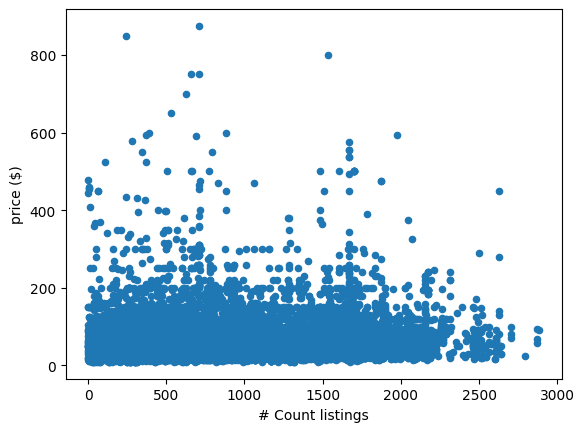

In [87]:
print(data_prefilter['Price'].corr(data_prefilter['Host Since in Days']))
data_prefilter.plot(kind='scatter', x='Host Since in Days', y='Price')
plt.xlabel('# Count listings')
plt.ylabel('price ($)')
plt.show()

In [62]:
data['Bed Type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

### 1. Dividimos en train y test